Prepared by

Asif Newaz

Lecturer, EEE, IUT

This notebook performs simple EDA on the KDDCup-99 dataset (10%) and preprocess the data for model training.

# Import 

In [91]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
%matplotlib notebook

In [93]:
data= pd.read_csv('kddcup.data_10_percent.gz', header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [94]:
columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome']

In [95]:
data.columns=columns

In [96]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [97]:
data.to_csv('kddcup_original_an.csv')

# Target variable

In [98]:
y= data['outcome']
y.value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: outcome, dtype: int64

In [99]:
attacks_types = {
    'normal': 'normal',
    'back': 'dos',
    'buffer_overflow': 'u2r',
    'ftp_write': 'r2l',
    'guess_passwd': 'r2l',
    'imap': 'r2l',
    'ipsweep': 'probe',
    'land': 'dos',
    'loadmodule': 'u2r',
    'multihop': 'r2l',
    'neptune': 'dos',
    'nmap': 'probe',
    'perl': 'u2r',
    'phf': 'r2l',
    'pod': 'dos',
    'portsweep': 'probe',
    'rootkit': 'u2r',
    'satan': 'probe',
    'smurf': 'dos',
    'spy': 'r2l',
    'teardrop': 'dos',
    'warezclient': 'r2l',
    'warezmaster': 'r2l'}

In [100]:
# Remove the trailing dot from the last column
data['outcome'] = data['outcome'].str.rstrip('.')
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal


In [101]:
data['outcome'] = data['outcome'].replace(attacks_types)

In [102]:
data['outcome'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: outcome, dtype: int64

In [103]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal


# Features

In [104]:
data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

4 categorical

# Missing data

In [105]:
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

No null values are there

# Duplicates

In [106]:
data.duplicated().sum()

348436

There are too many duplicate rows. Need to remove them.

In [107]:
data.drop_duplicates(keep='first', inplace = True)

In [108]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal


# Statistics

In [111]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,145585.000000,1.455850e+05,1.455850e+05,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,...,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000
mean,132.026088,7.995754e+03,2.859800e+03,0.000137,0.020201,0.000048,0.100175,0.000515,0.491493,0.026177,...,181.469416,129.935563,0.553219,0.061389,0.092819,0.019048,0.291599,0.290980,0.110464,0.107676
std,1224.161209,1.820390e+06,6.081000e+04,0.011720,0.239369,0.010150,1.426803,0.028586,0.499929,3.311384,...,99.097409,114.714725,0.456236,0.147021,0.241112,0.060410,0.452493,0.453448,0.306098,0.304221
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,78.000000,12.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.470000e+02,1.050000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,117.000000,0.770000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.880000e+02,1.165000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.030000,0.020000,1.000000,1.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<IPython.core.display.Javascript object>


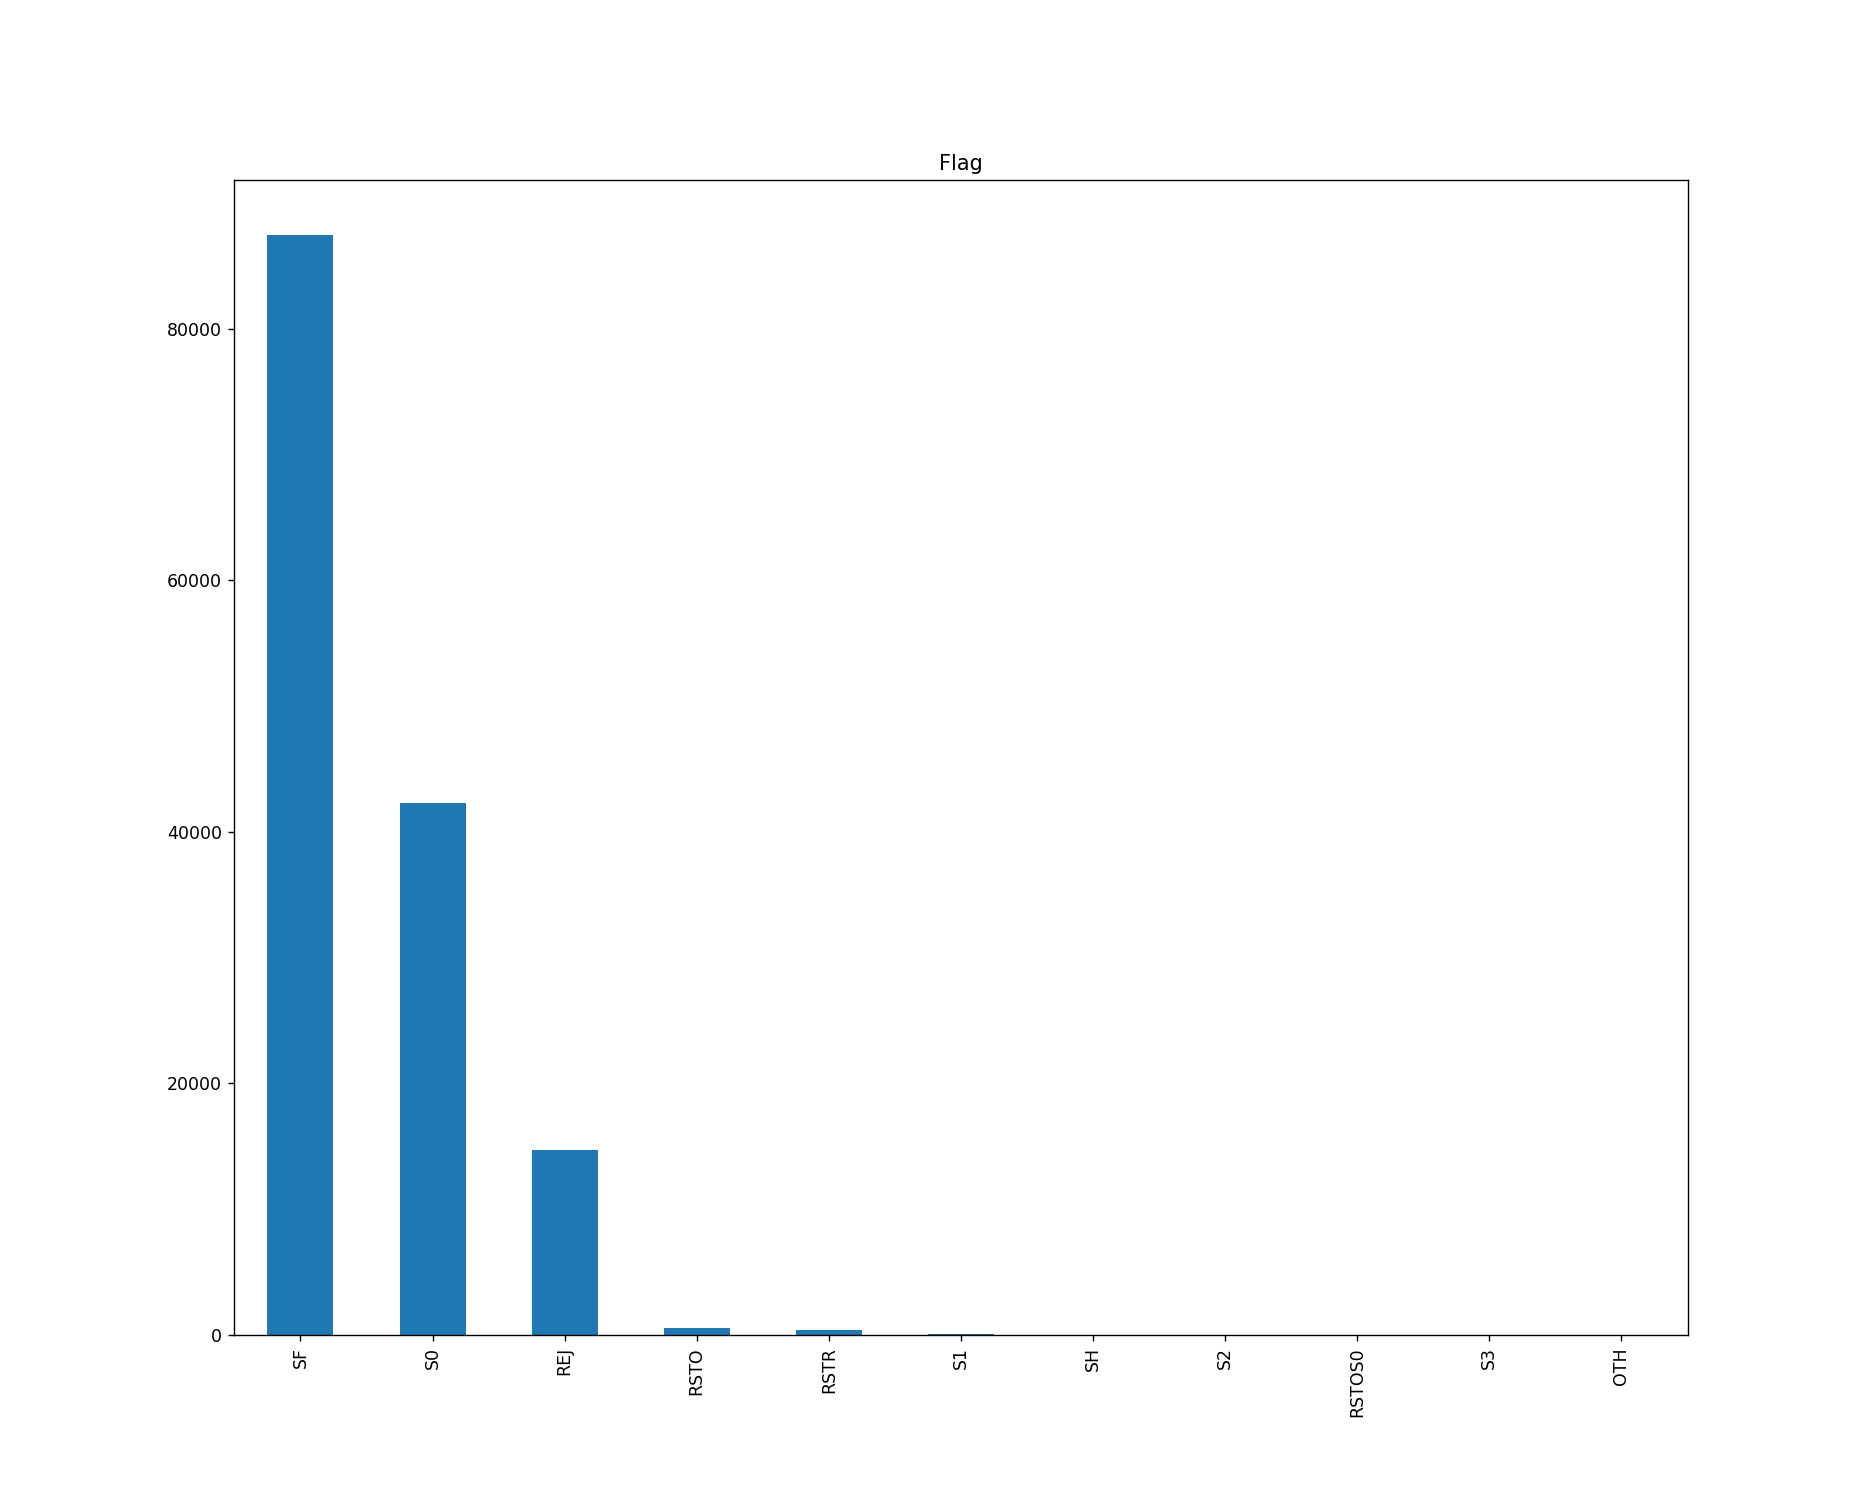

Text(0.5, 1.0, 'Flag')

In [112]:
plt.figure(figsize=(15,12))
data['flag'].value_counts().plot(kind='bar')
plt.title('Flag')

In [113]:
plt.savefig('flag.png', dpi=600)

<IPython.core.display.Javascript object>


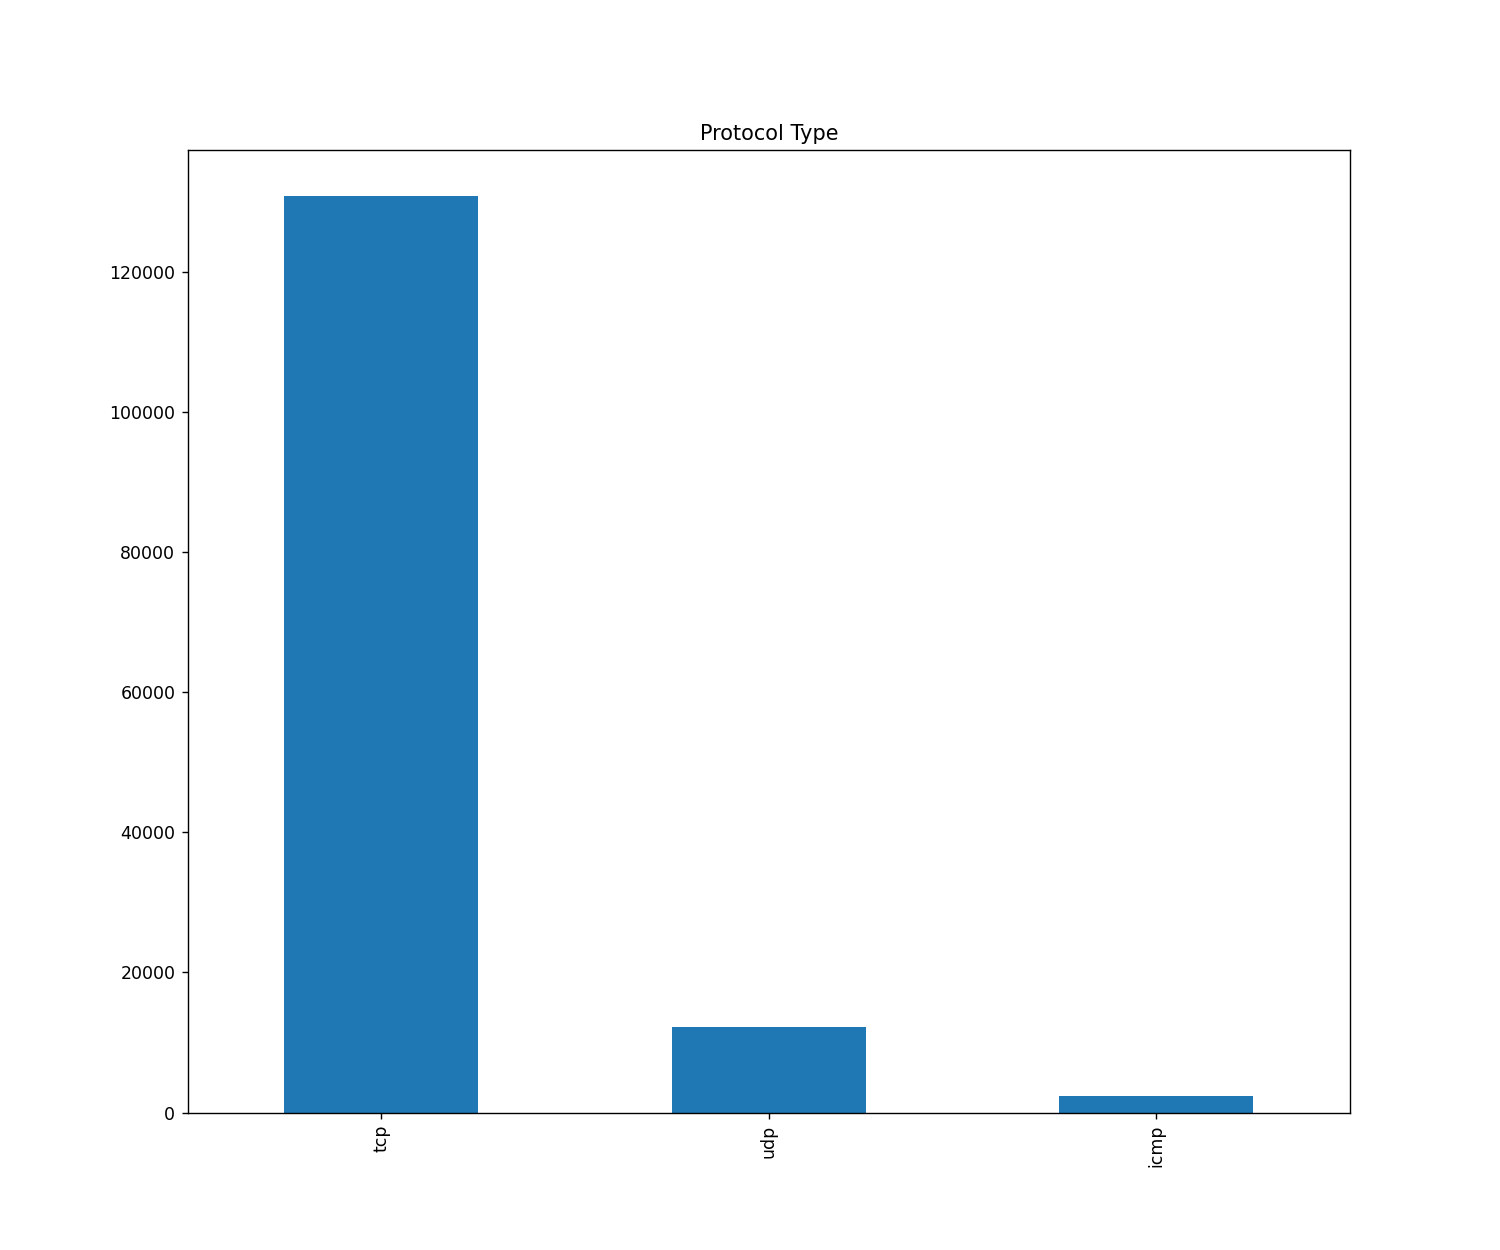

Text(0.5, 1.0, 'Protocol Type')

In [114]:
plt.figure(figsize=(12,10))
data['protocol_type'].value_counts().plot(kind='bar')
plt.title('Protocol Type')

In [115]:
plt.savefig('protocol.png', dpi=600)

<IPython.core.display.Javascript object>


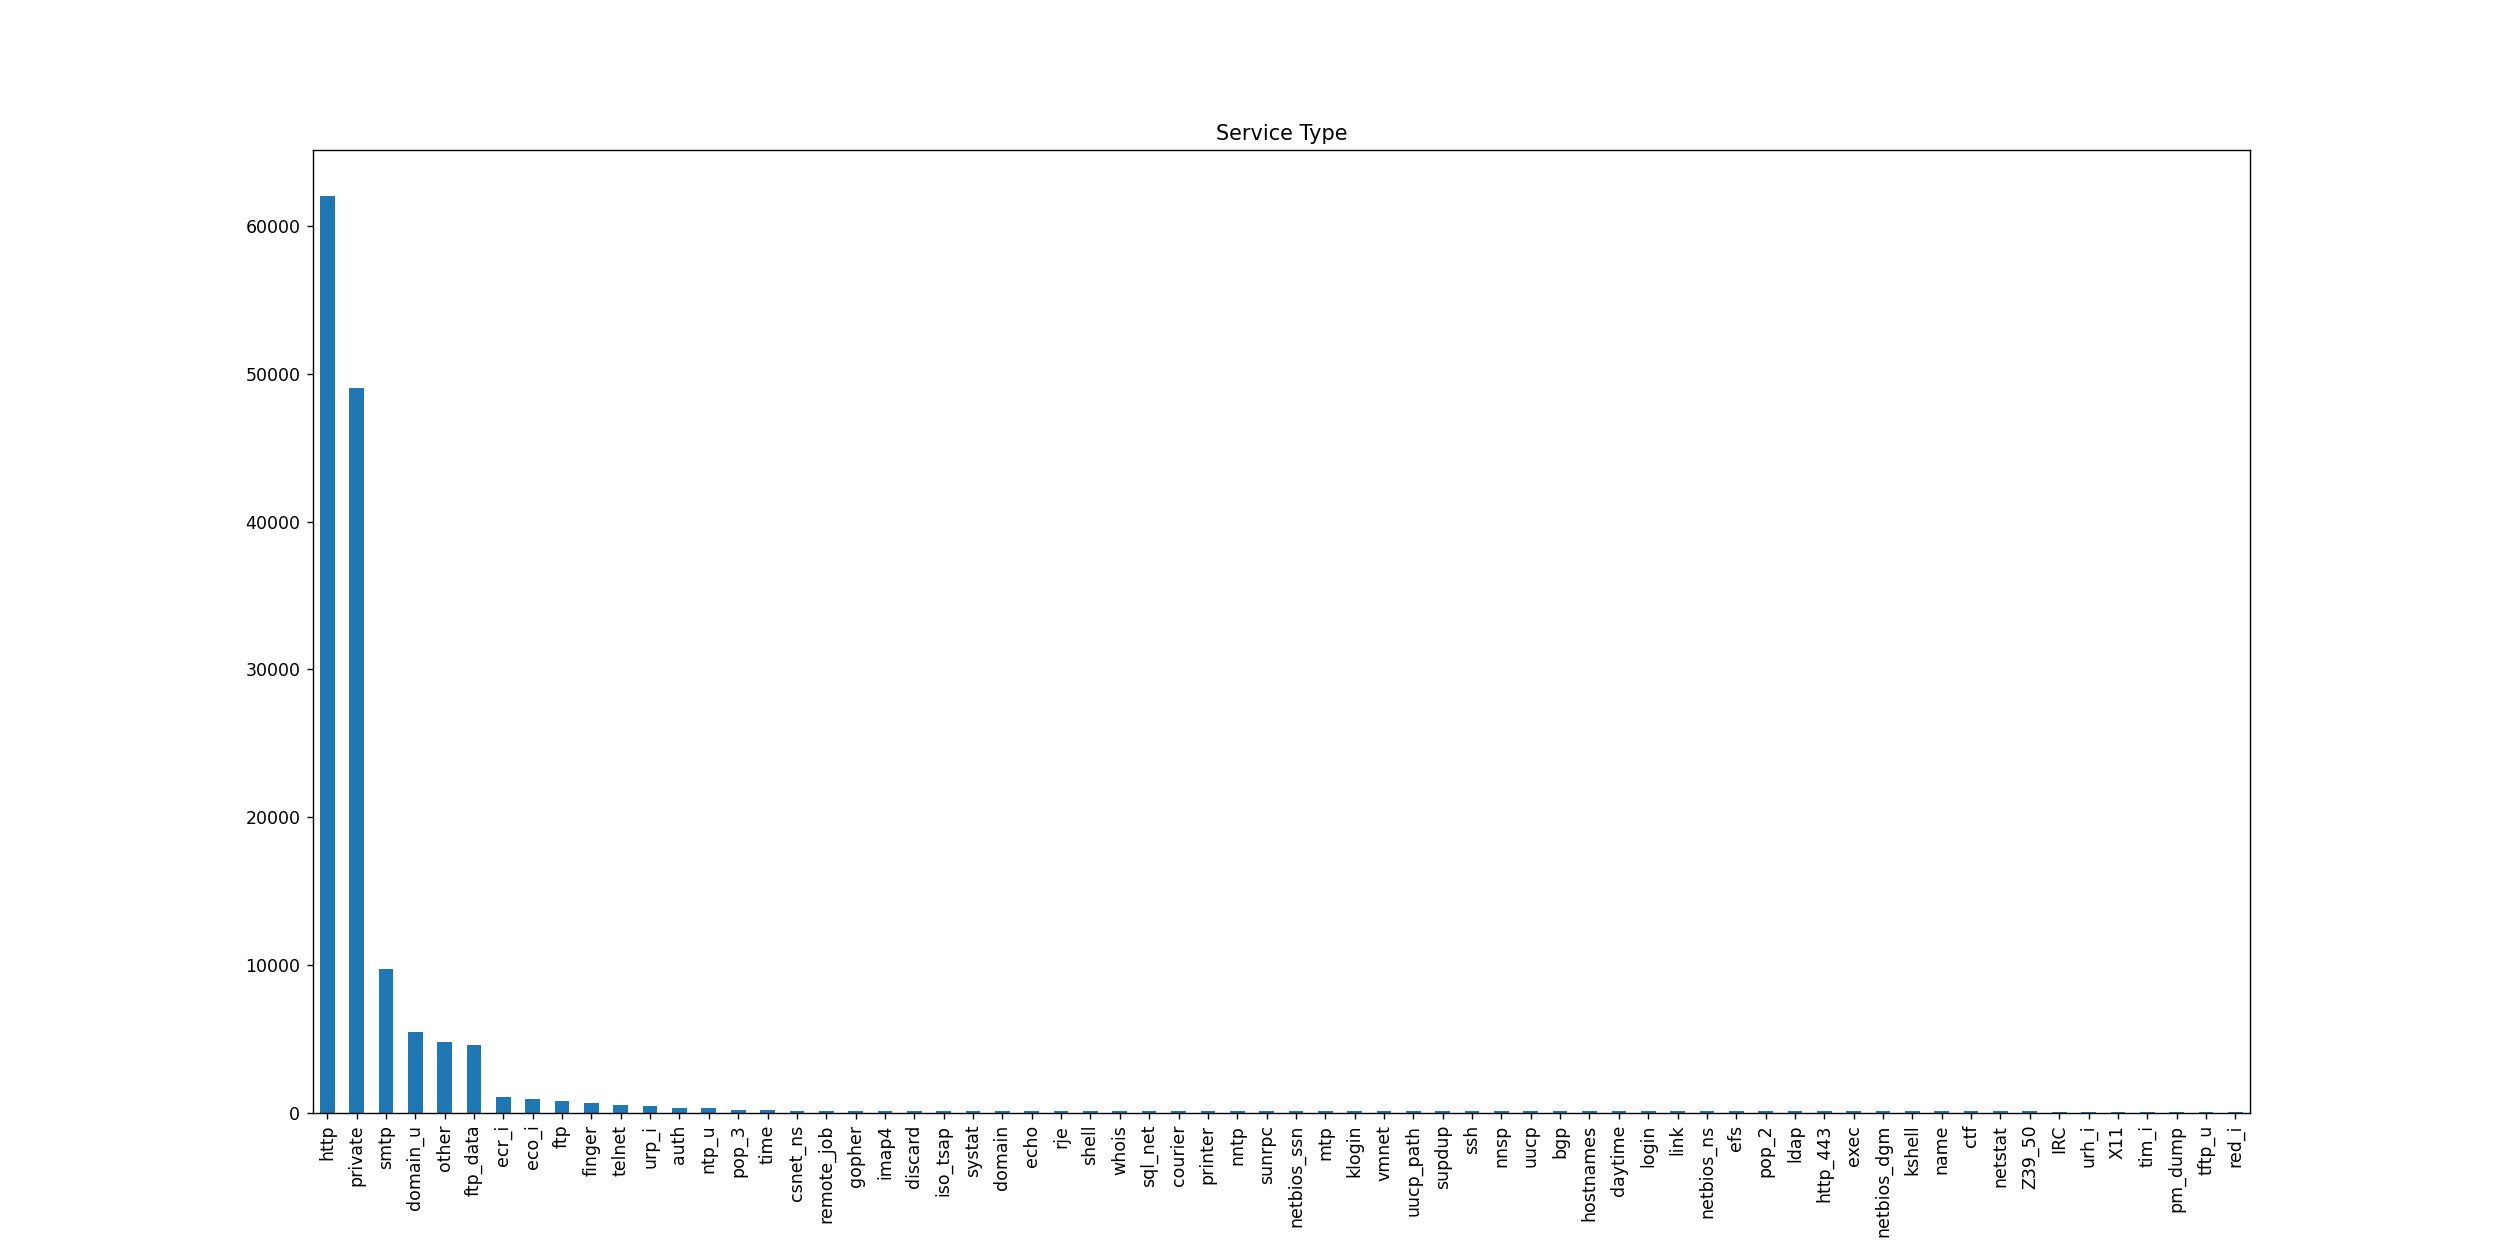

Text(0.5, 1.0, 'Service Type')

In [116]:
plt.figure(figsize=(20,10))
data['service'].value_counts().plot(kind='bar')
plt.title('Service Type')

In [117]:
plt.savefig('service.png', dpi=600)

<IPython.core.display.Javascript object>


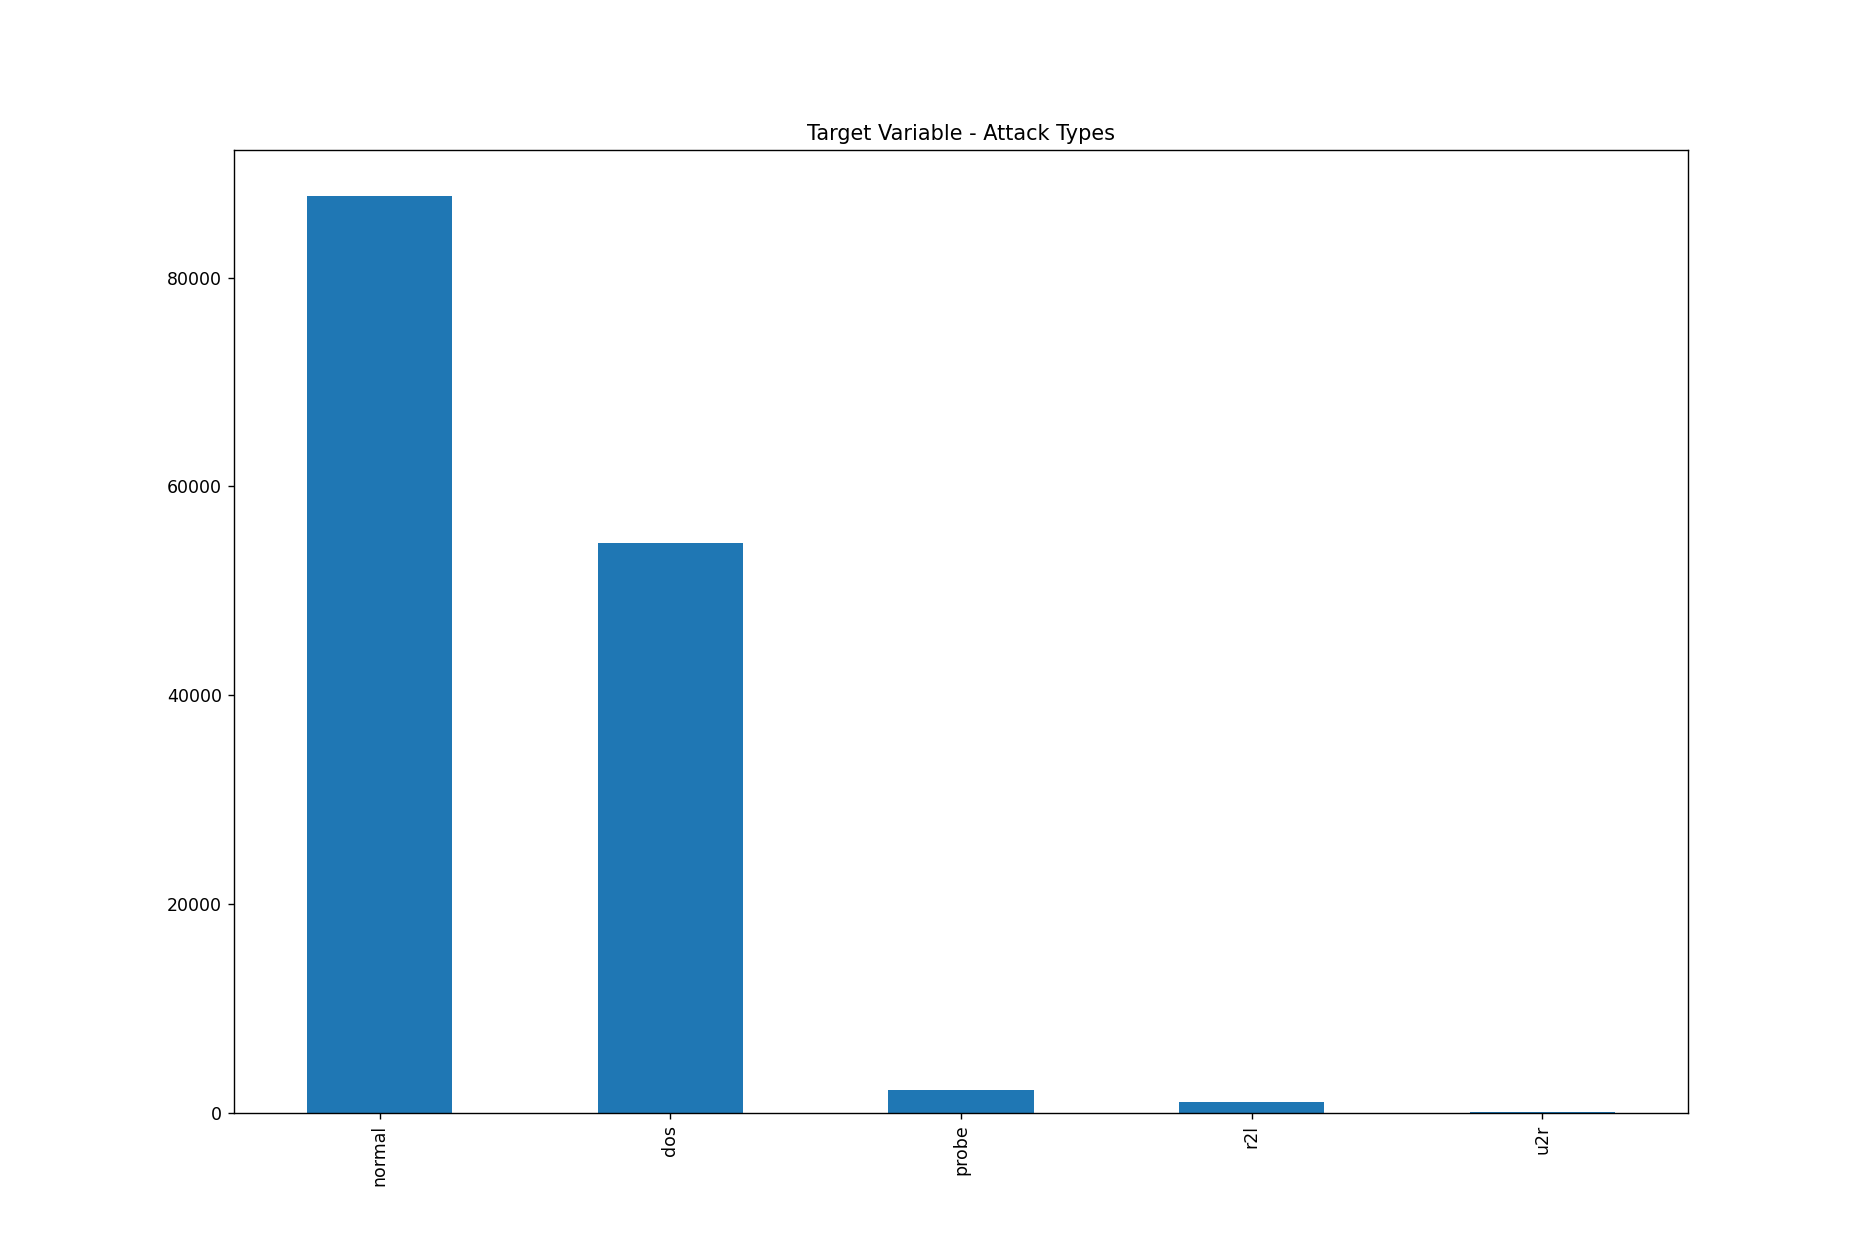

Text(0.5, 1.0, 'Target Variable - Attack Types')

In [118]:
plt.figure(figsize=(15,10))
data['outcome'].value_counts().plot(kind='bar')
plt.title('Target Variable - Attack Types')

In [119]:
plt.savefig('outcome.png', dpi=600)

# Correlation analysis

In [120]:
corr = data.corr()
corr

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.004280,0.002582,-0.001264,-0.009102,0.003707,0.009855,0.004343,-0.090668,0.061454,...,0.062702,-0.116825,-0.120372,0.429391,0.353520,-0.028847,-0.067714,-0.067908,-0.003710,0.002456
src_bytes,0.004280,1.000000,-0.000162,-0.000051,-0.000365,-0.000018,0.003999,-0.000077,-0.000928,0.000025,...,-0.000117,-0.003937,-0.002144,0.000138,0.005619,0.000760,-0.001742,0.001111,-0.001092,0.001327
dst_bytes,0.002582,-0.000162,1.000000,-0.000551,-0.003969,0.016147,0.000658,0.048789,0.028106,0.022755,...,-0.034975,0.013326,0.031658,-0.016821,0.028692,0.001728,-0.028956,-0.028726,-0.014865,-0.015282
land,-0.001264,-0.000051,-0.000551,1.000000,-0.000989,-0.000056,-0.000823,-0.000211,-0.011524,-0.000093,...,-0.021110,-0.012802,0.007972,-0.002662,0.037467,0.106807,0.015462,0.008634,-0.003981,-0.004149
wrong_fragment,-0.009102,-0.000365,-0.003969,-0.000989,1.000000,-0.000400,-0.005925,-0.001521,-0.082970,-0.000667,...,0.039511,-0.051513,-0.051002,0.085303,0.064643,-0.009676,-0.049450,-0.054156,0.029722,-0.029871
urgent,0.003707,-0.000018,0.016147,-0.000056,-0.000400,1.000000,0.000142,0.141954,0.004818,0.014268,...,-0.006155,-0.005306,-0.003356,0.013441,0.002639,-0.001494,-0.003053,-0.003040,-0.001709,-0.001677
hot,0.009855,0.003999,0.000658,-0.000823,-0.005925,0.000142,1.000000,0.007997,0.070769,0.003533,...,0.001459,-0.037462,-0.024314,-0.010236,-0.018590,-0.018851,-0.043728,-0.044732,-0.020471,-0.021826
num_failed_logins,0.004343,-0.000077,0.048789,-0.000211,-0.001521,0.141954,0.007997,1.000000,-0.013873,0.006824,...,-0.021351,-0.017022,0.008763,-0.002344,0.002879,0.016871,-0.007589,-0.008348,0.031271,0.029892
logged_in,-0.090668,-0.000928,0.028106,-0.011524,-0.082970,0.004818,0.070769,-0.013873,1.000000,0.008041,...,-0.473381,0.759837,0.769709,-0.308661,-0.095739,0.033618,-0.627970,-0.627845,-0.331087,-0.320667
num_compromised,0.061454,0.000025,0.022755,-0.000093,-0.000667,0.014268,0.003533,0.006824,0.008041,1.000000,...,-0.006565,-0.005592,-0.002194,-0.000609,-0.001620,-0.000536,-0.004086,-0.003538,-0.002371,-0.002377


<IPython.core.display.Javascript object>


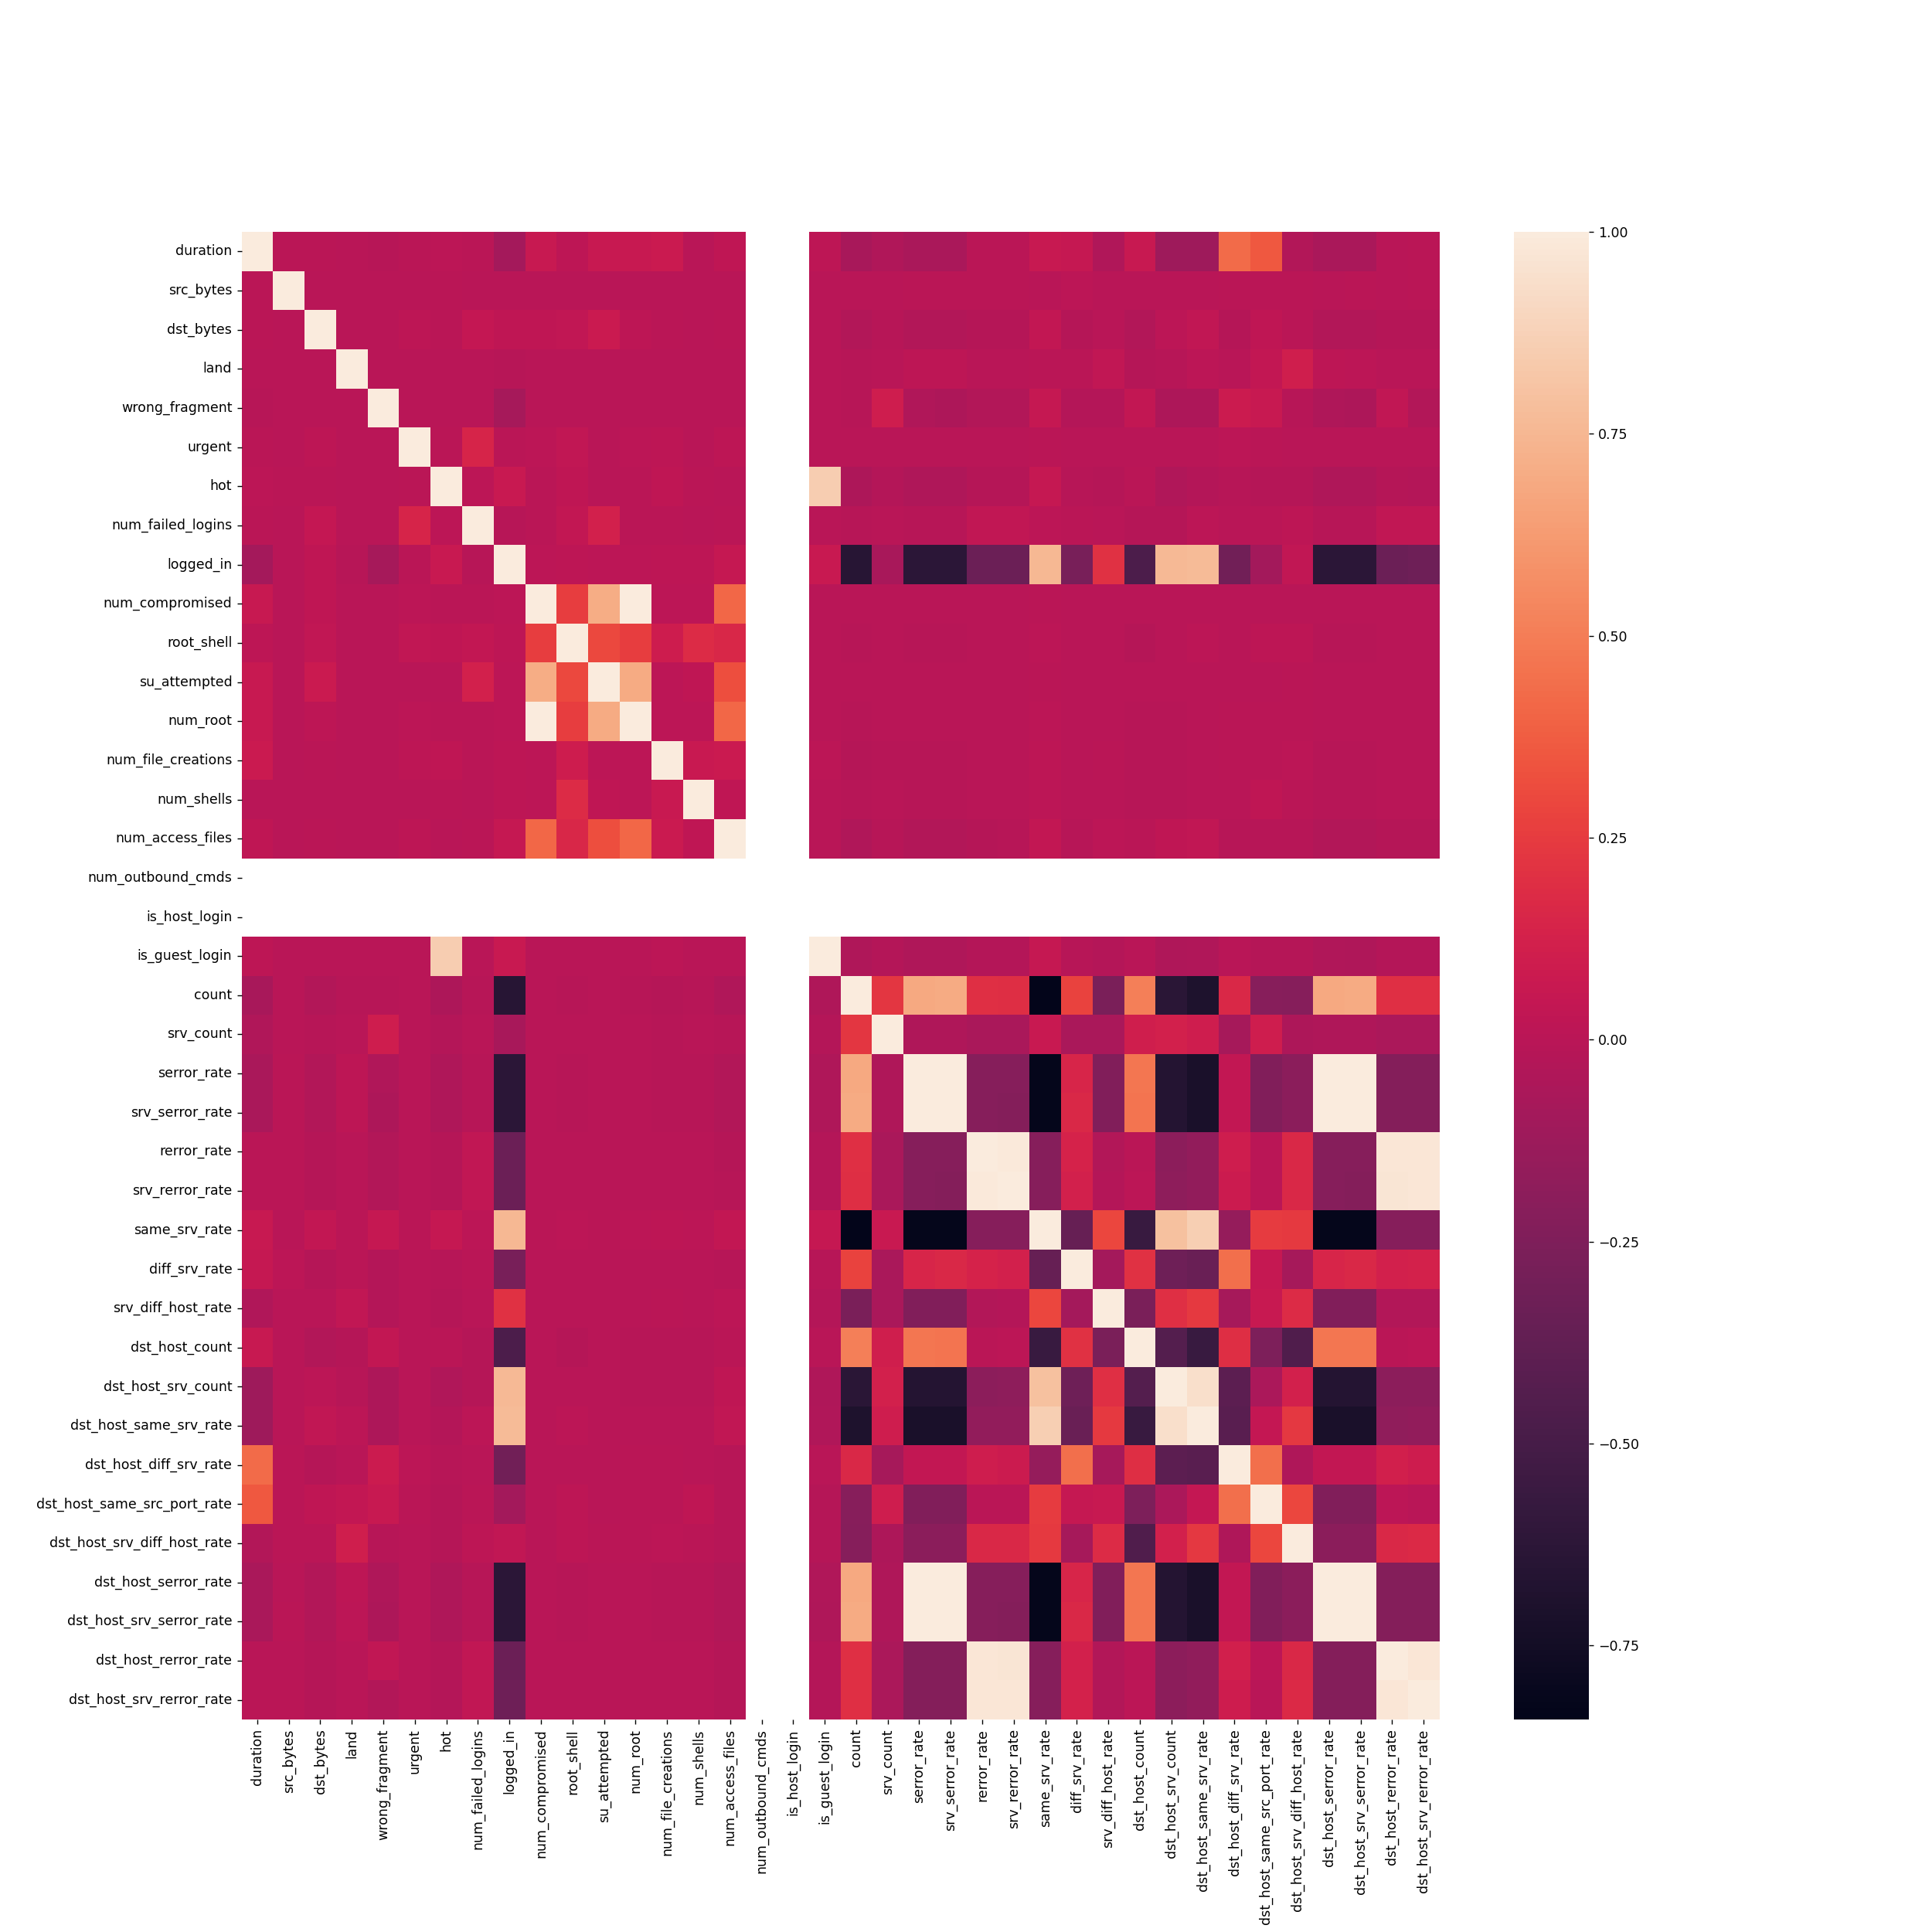

<AxesSubplot:>

In [121]:
plt.figure(figsize=(20,20))

sns.heatmap(corr)

There are some highly correlated features. We may want to remove some of them.

# Constant Valued feature

There are also two features where we are getting 0. They have only 1 unique values -  so no variance. Doesn't help in predictive modelling. We can remove them.

In [122]:
data['num_outbound_cmds'].value_counts()

0    145585
Name: num_outbound_cmds, dtype: int64

In [123]:
data['is_host_login'].value_counts()

0    145585
Name: is_host_login, dtype: int64

In [124]:
data.drop(['num_outbound_cmds', 'is_host_login'], axis=1, inplace = True)

In [125]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal


# Redundant features

Features with correlation value higher than 90 or 95 are highly correlated. One can be removed. 

In [126]:
# Find where the correlation is greater than 0.9 and exclude the diagonal (correlation with itself)
threshold = 0.9
high_corr = corr[(corr > threshold) & (corr < 1)]
high_corr

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
src_bytes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dst_bytes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wrong_fragment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
urgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_failed_logins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
logged_in,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_compromised,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
high_corr.stack()
# stack() function in pandas reshapes a DataFrame by compressing the columns into the index

num_compromised           num_root                    0.994215
num_root                  num_compromised             0.994215
serror_rate               srv_serror_rate             0.996363
                          dst_host_serror_rate        0.996843
                          dst_host_srv_serror_rate    0.995152
srv_serror_rate           serror_rate                 0.996363
                          dst_host_serror_rate        0.995122
                          dst_host_srv_serror_rate    0.998351
rerror_rate               srv_rerror_rate             0.991317
                          dst_host_rerror_rate        0.975514
                          dst_host_srv_rerror_rate    0.972614
srv_rerror_rate           rerror_rate                 0.991317
                          dst_host_rerror_rate        0.967375
                          dst_host_srv_rerror_rate    0.975105
dst_host_srv_count        dst_host_same_srv_rate      0.936534
dst_host_same_srv_rate    dst_host_srv_count          0

In [128]:
correlated_pairs = high_corr.stack().index.tolist()
correlated_pairs

[('num_compromised', 'num_root'),
 ('num_root', 'num_compromised'),
 ('serror_rate', 'srv_serror_rate'),
 ('serror_rate', 'dst_host_serror_rate'),
 ('serror_rate', 'dst_host_srv_serror_rate'),
 ('srv_serror_rate', 'serror_rate'),
 ('srv_serror_rate', 'dst_host_serror_rate'),
 ('srv_serror_rate', 'dst_host_srv_serror_rate'),
 ('rerror_rate', 'srv_rerror_rate'),
 ('rerror_rate', 'dst_host_rerror_rate'),
 ('rerror_rate', 'dst_host_srv_rerror_rate'),
 ('srv_rerror_rate', 'rerror_rate'),
 ('srv_rerror_rate', 'dst_host_rerror_rate'),
 ('srv_rerror_rate', 'dst_host_srv_rerror_rate'),
 ('dst_host_srv_count', 'dst_host_same_srv_rate'),
 ('dst_host_same_srv_rate', 'dst_host_srv_count'),
 ('dst_host_serror_rate', 'serror_rate'),
 ('dst_host_serror_rate', 'srv_serror_rate'),
 ('dst_host_serror_rate', 'dst_host_srv_serror_rate'),
 ('dst_host_srv_serror_rate', 'serror_rate'),
 ('dst_host_srv_serror_rate', 'srv_serror_rate'),
 ('dst_host_srv_serror_rate', 'dst_host_serror_rate'),
 ('dst_host_rerror_r

In [129]:
f_to_drop = ['num_root', 'srv_serror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'srv_rerror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'dst_host_same_srv_rate' ]

In [130]:
data.drop(f_to_drop, axis=1, inplace= True)
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,outcome
0,0,tcp,http,SF,181,5450,0,0,0,0,...,0.0,1.0,0.0,0.00,9,9,0.0,0.11,0.00,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,0.0,1.0,0.0,0.00,19,19,0.0,0.05,0.00,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,0.0,1.0,0.0,0.00,29,29,0.0,0.03,0.00,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,0.0,1.0,0.0,0.00,39,39,0.0,0.03,0.00,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0.0,1.0,0.0,0.00,49,49,0.0,0.02,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,0.0,1.0,0.0,0.40,86,255,0.0,0.01,0.05,normal
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,0.0,1.0,0.0,0.00,6,255,0.0,0.17,0.05,normal
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,0.0,1.0,0.0,0.17,16,255,0.0,0.06,0.05,normal
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,0.0,1.0,0.0,0.17,26,255,0.0,0.04,0.05,normal


# Map categorical features

There are 4 categorical features we need to map.

In [131]:
data['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [132]:
data['protocol_type'] = data['protocol_type'].map({'tcp':0, 'udp':1, 'icmp':2})

In [133]:
data['flag'].unique()

array(['SF', 'S1', 'REJ', 'S2', 'S0', 'S3', 'RSTO', 'RSTR', 'RSTOS0',
       'OTH', 'SH'], dtype=object)

In [134]:
# from many categories, we can use label encoding
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()

In [135]:
data['flag']= enc.fit_transform(data['flag'])
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,outcome
0,0,0,http,9,181,5450,0,0,0,0,...,0.0,1.0,0.0,0.00,9,9,0.0,0.11,0.00,normal
1,0,0,http,9,239,486,0,0,0,0,...,0.0,1.0,0.0,0.00,19,19,0.0,0.05,0.00,normal
2,0,0,http,9,235,1337,0,0,0,0,...,0.0,1.0,0.0,0.00,29,29,0.0,0.03,0.00,normal
3,0,0,http,9,219,1337,0,0,0,0,...,0.0,1.0,0.0,0.00,39,39,0.0,0.03,0.00,normal
4,0,0,http,9,217,2032,0,0,0,0,...,0.0,1.0,0.0,0.00,49,49,0.0,0.02,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,0,http,9,310,1881,0,0,0,0,...,0.0,1.0,0.0,0.40,86,255,0.0,0.01,0.05,normal
494017,0,0,http,9,282,2286,0,0,0,0,...,0.0,1.0,0.0,0.00,6,255,0.0,0.17,0.05,normal
494018,0,0,http,9,203,1200,0,0,0,0,...,0.0,1.0,0.0,0.17,16,255,0.0,0.06,0.05,normal
494019,0,0,http,9,291,1200,0,0,0,0,...,0.0,1.0,0.0,0.17,26,255,0.0,0.04,0.05,normal


In [136]:
data['flag'].value_counts()

9     87458
5     42278
1     14712
2       569
4       425
6        57
10       34
7        24
3        11
8        10
0         7
Name: flag, dtype: int64

In [137]:
data['service'].unique()

array(['http', 'smtp', 'finger', 'domain_u', 'auth', 'telnet', 'ftp',
       'eco_i', 'ntp_u', 'ecr_i', 'other', 'private', 'pop_3', 'ftp_data',
       'rje', 'time', 'mtp', 'link', 'remote_job', 'gopher', 'ssh',
       'name', 'whois', 'domain', 'login', 'imap4', 'daytime', 'ctf',
       'nntp', 'shell', 'IRC', 'nnsp', 'http_443', 'exec', 'printer',
       'efs', 'courier', 'uucp', 'klogin', 'kshell', 'echo', 'discard',
       'systat', 'supdup', 'iso_tsap', 'hostnames', 'csnet_ns', 'pop_2',
       'sunrpc', 'uucp_path', 'netbios_ns', 'netbios_ssn', 'netbios_dgm',
       'sql_net', 'vmnet', 'bgp', 'Z39_50', 'ldap', 'netstat', 'urh_i',
       'X11', 'urp_i', 'pm_dump', 'tftp_u', 'tim_i', 'red_i'],
      dtype=object)

In [138]:
data['service']= enc.fit_transform(data['service'])
data['service'].value_counts()

22    62054
45    49057
50     9721
11     5425
40     4769
      ...  
1        11
58        5
41        1
57        1
46        1
Name: service, Length: 66, dtype: int64

In [140]:
data['outcome'].value_counts()

normal    87832
dos       54572
probe      2130
r2l         999
u2r          52
Name: outcome, dtype: int64

In [141]:
data['outcome'] = data['outcome'].map({'normal':0, 'dos':1, 'probe':2, 'r2l':3, 'u2r':4})
data['outcome'].value_counts()

0    87832
1    54572
2     2130
3      999
4       52
Name: outcome, dtype: int64

<IPython.core.display.Javascript object>


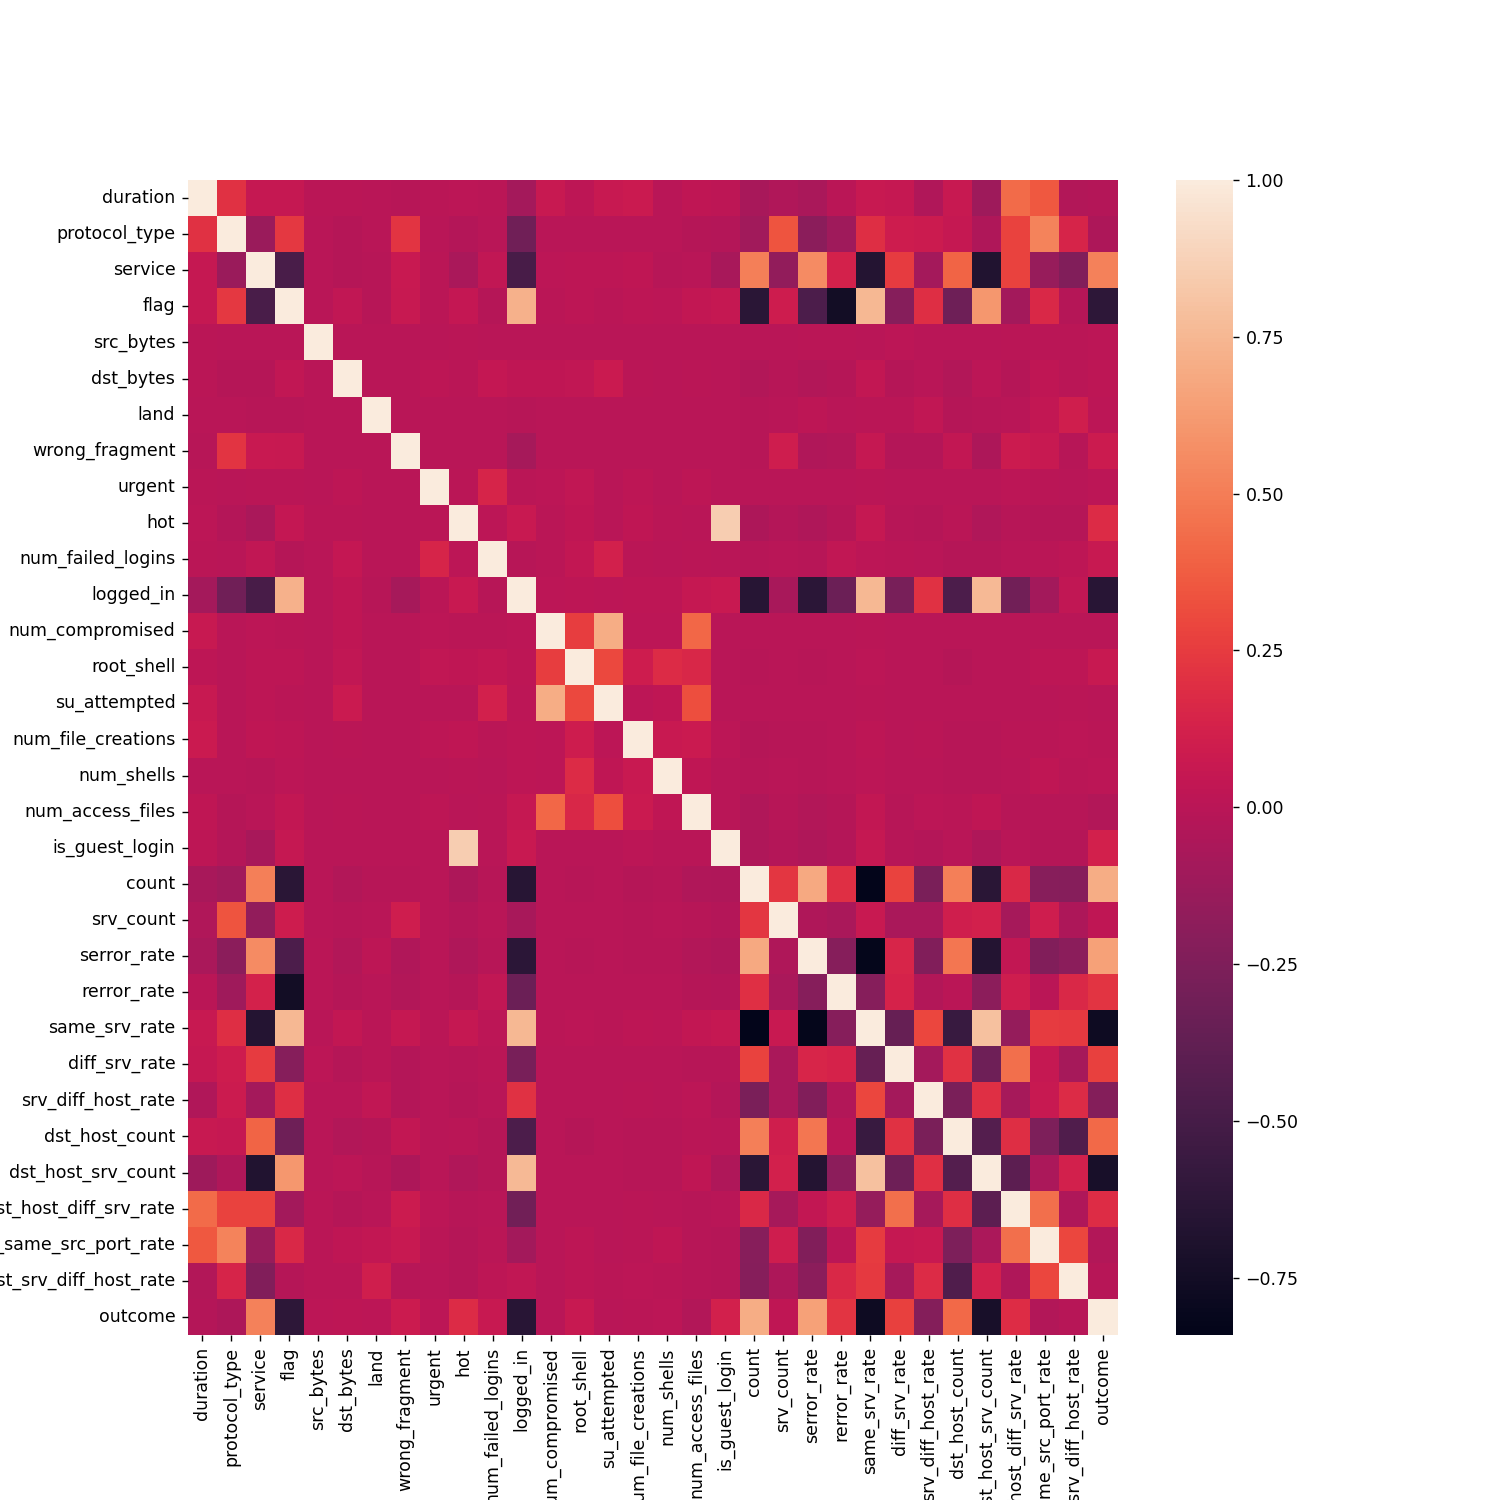

<AxesSubplot:>

In [142]:
plt.figure(figsize=(12,12))

sns.heatmap(data.corr())

In [143]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,outcome
0,0,0,22,9,181,5450,0,0,0,0,...,0.0,1.0,0.0,0.00,9,9,0.0,0.11,0.00,0
1,0,0,22,9,239,486,0,0,0,0,...,0.0,1.0,0.0,0.00,19,19,0.0,0.05,0.00,0
2,0,0,22,9,235,1337,0,0,0,0,...,0.0,1.0,0.0,0.00,29,29,0.0,0.03,0.00,0
3,0,0,22,9,219,1337,0,0,0,0,...,0.0,1.0,0.0,0.00,39,39,0.0,0.03,0.00,0
4,0,0,22,9,217,2032,0,0,0,0,...,0.0,1.0,0.0,0.00,49,49,0.0,0.02,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,0,22,9,310,1881,0,0,0,0,...,0.0,1.0,0.0,0.40,86,255,0.0,0.01,0.05,0
494017,0,0,22,9,282,2286,0,0,0,0,...,0.0,1.0,0.0,0.00,6,255,0.0,0.17,0.05,0
494018,0,0,22,9,203,1200,0,0,0,0,...,0.0,1.0,0.0,0.17,16,255,0.0,0.06,0.05,0
494019,0,0,22,9,291,1200,0,0,0,0,...,0.0,1.0,0.0,0.17,26,255,0.0,0.04,0.05,0


So, the data is now ready for training and predictive modelling.

In [144]:
data.to_csv('kddcup_processed_an.csv')